In [452]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image
#from scipy.misc import imread

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch

# Read data and plot

In [491]:
sample_n = 1000 # number of samples
r = 40  # shrink size to focus on center part

datafile = 'SwRI-D/d_800.jpg'
im0 = Image.open(datafile)
d_all = np.array(im0)
_h, _w, _ = d_all.shape
d_cut = d_all[_h//2-r:_h//2+r, _w//2-r:_w//2+r, :]
d_shape = d_cut.shape
h, w, _ = d_cut.shape
print('data shape {}'.format(d_shape))

data shape (80, 80, 3)


<IPython.core.display.Javascript object>


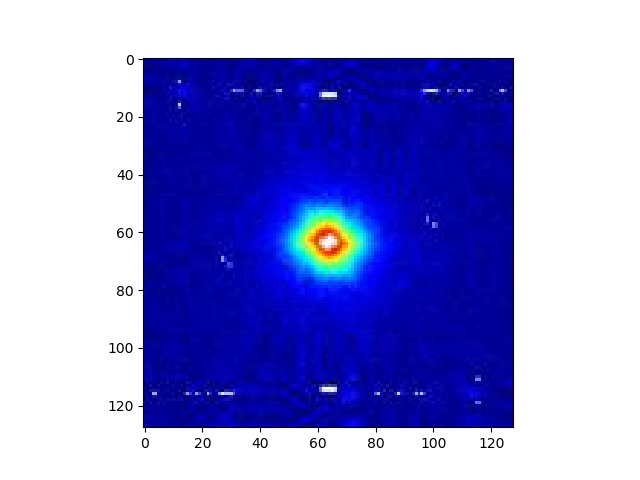

<IPython.core.display.Javascript object>


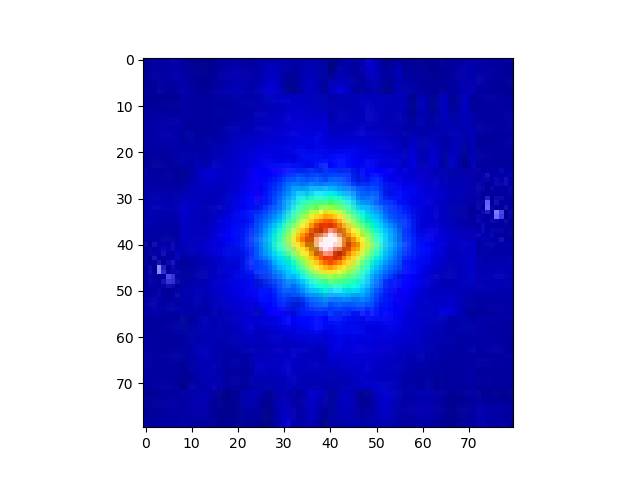

In [492]:
fig, ax = plt.subplots()
ax.imshow(im0)

# image after cut
fig, ax = plt.subplots()
ax.imshow(d_cut)

Assemble data into correct shape for analysis

In [493]:
#data0 = np.zeros([sample_n, d_shape[0]*d_shape[1]*d_shape[2]])   # save full RGB data
data = np.zeros([sample_n, d_shape[0]*d_shape[1]])              # save grey data, average in 3rd dim
data_line = np.zeros([sample_n, d_shape[1]])                   # only line data, i.e., center row
row_n = d_shape[1] // 2

for i in range(sample_n):
    fpath = 'SwRI-D/d_{}.jpg'.format(i)
    tmp = Image.open(fpath)
    d_all = np.array(tmp)
    s1, s2, _ = d_all.shape
    d = d_all[s1//2-r : s1//2+r, s2//2-r : s2//2+r, :]
    d_grey = np.mean(d, axis=2)                               # averaged RGB data
    #data0[i, :] = d.ravel()
    data[i,:] = d_grey.ravel()
    data_line[i,:] = d_grey[row_n, :]
print('data shape: {}'.format(data.shape)) 
print('data_line shape: {}'.format(data_line.shape)) 

data shape: (1000, 6400)
data_line shape: (1000, 80)


<IPython.core.display.Javascript object>


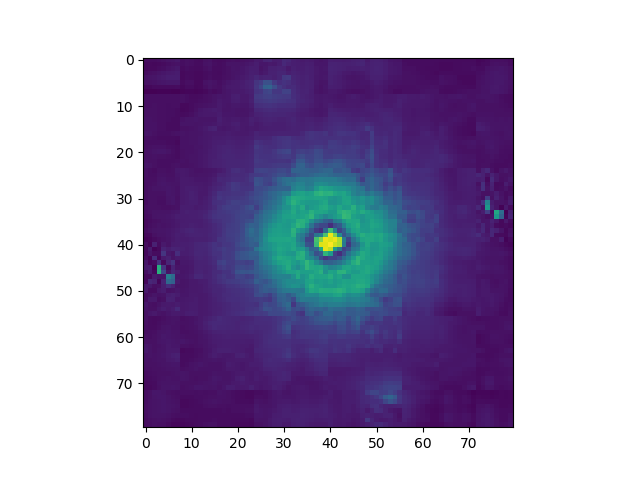

In [494]:
fig, ax = plt.subplots()
ax.imshow(data[30,:].reshape(d_shape[0],d_shape[1]))

# fig, ax = plt.subplots()   # line plot for center row
# for i in range(500,555):
#     ax.plot(data_line[i,:])

# PCA

In [496]:
# Visualize the results on PCA-reduced data

# get low dimension from PCA for plot
n_comp = 8
pca = PCA(n_components=n_comp)
reduced_data = pca.fit_transform(data)
print(pca.components_.shape, reduced_data.shape)

(8, 6400) (1000, 8)


In [289]:
# get eigen vectors
eigenfaces = pca.components_.reshape((n_comp, h, w))
eigenfaces.shape

(8, 80, 80)

<IPython.core.display.Javascript object>


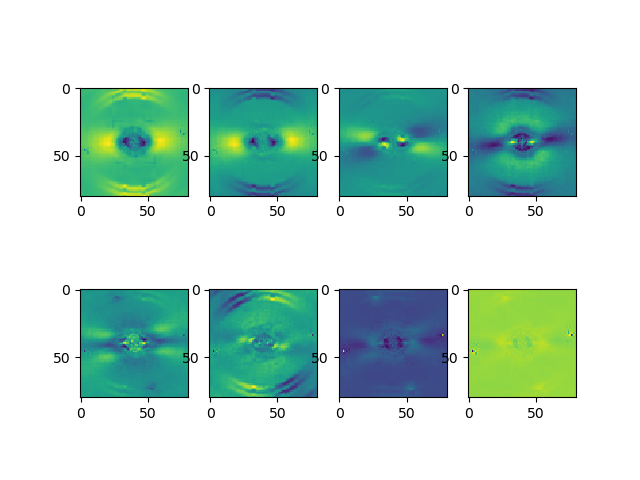

In [497]:
# egien face images
fig, axs = plt.subplots(nrows=2, ncols=4)
for i,ax in enumerate(axs.ravel()):
    im = ax.imshow(eigenfaces[i])
#plt.savefig('pca_6.jpg')

In [320]:
# fig, ax = plt.subplots()
# grid = ImageGrid(fig, 111, 
#                  nrows_ncols=(2, 4),
#                  cbar_size='7%',
#                  cbar_pad='2%')
# for i,g in enumerate(grid):
#     im = g.imshow(eigenfaces[i])
#     grid.cbar_axes[i].colorbar(im)
# fig.canvas.draw_idle()

In [498]:
pca.explained_variance_ratio_

array([ 0.61421538,  0.1189949 ,  0.06815969,  0.02942495,  0.01294305,
        0.01188478,  0.00861728,  0.00829057])

<IPython.core.display.Javascript object>


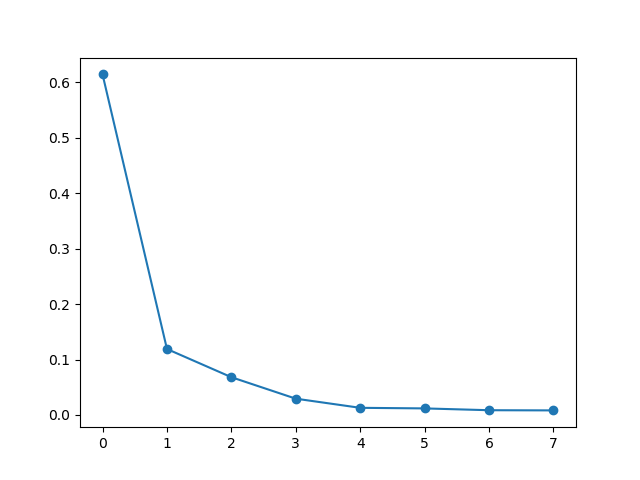

In [499]:
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_, '-o')

# K means

In [500]:
#np.random.seed(42)

nclusters = 4
kmeans = KMeans(init='k-means++', n_clusters=nclusters, n_init=10)
kmeans_out = kmeans.fit_predict(data)

# K means on reduced data gives similar results
kmeans_out_r = kmeans.fit_predict(reduced_data)

Project k means cluster results to different PCA components for visualization

<IPython.core.display.Javascript object>


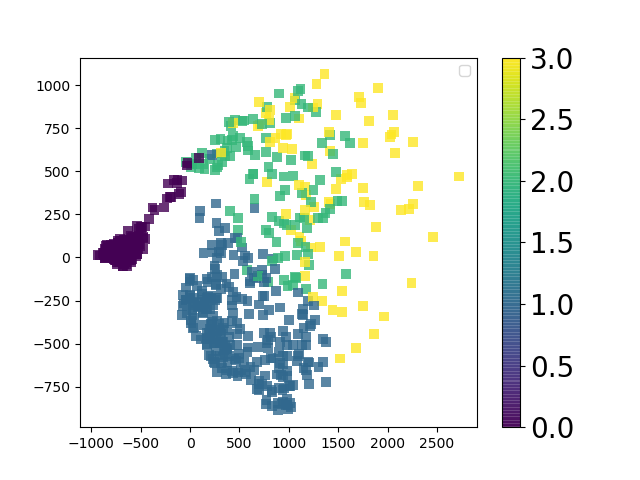

No handles with labels found to put in legend.


In [501]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()

<IPython.core.display.Javascript object>


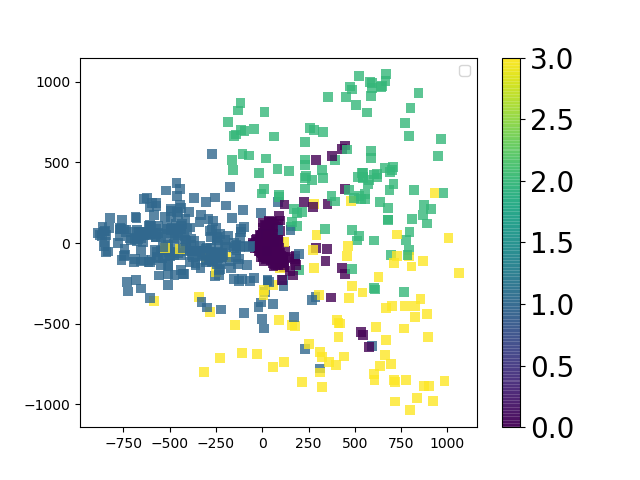

No handles with labels found to put in legend.


In [502]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 1], reduced_data[:, 2], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

plt.legend()

<IPython.core.display.Javascript object>


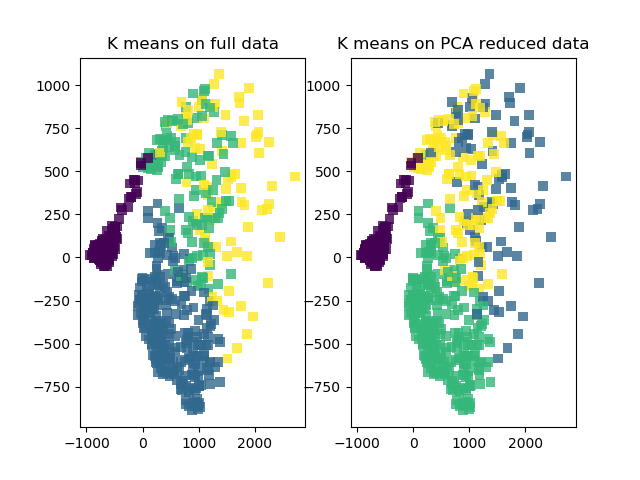

Text(0.5,1,'K means on PCA reduced data')

In [503]:
dim1 = 0
dim2 = 1
fig, axs = plt.subplots(nrows=1, ncols=2)
im0 = axs[0].scatter(reduced_data[:, dim1], reduced_data[:, dim2], 
                c=kmeans_out, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
axs[0].set_title('K means on full data')
im1 = axs[1].scatter(reduced_data[:, dim1], reduced_data[:, dim2], 
                c=kmeans_out_r, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
axs[1].set_title('K means on PCA reduced data')
#cbar = fig.colorbar(im)
#cbar.ax.tick_params(labelsize=20) 
#plt.legend()

# Visualize images from different groups

In [509]:
result_from = kmeans_out
get_index = lambda x: np.where(result_from==x)[0]

total num from group 0: 523


<IPython.core.display.Javascript object>


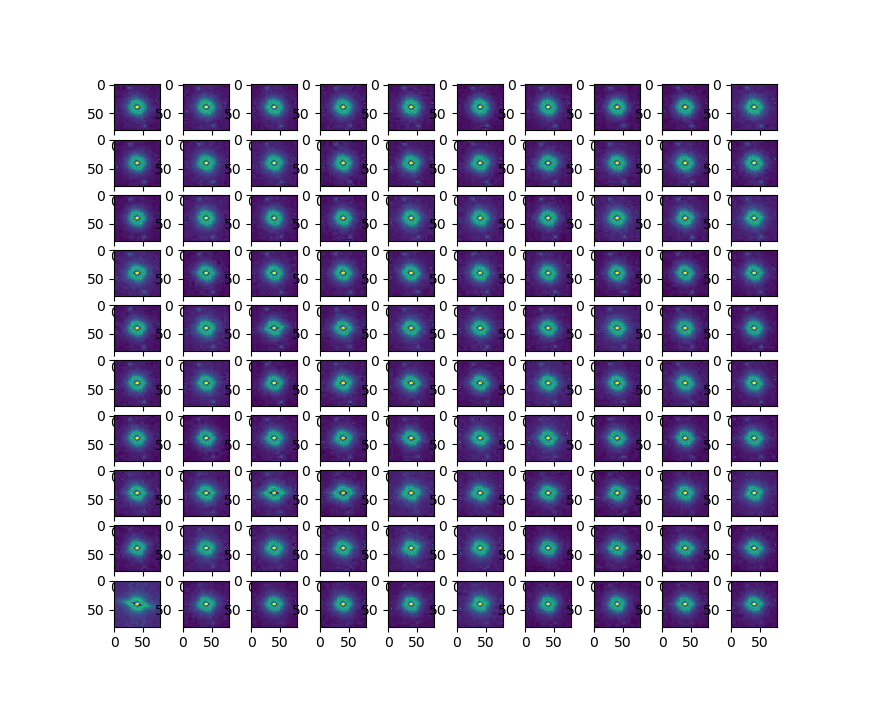

In [527]:
group_id = 0
idv = get_index(group_id)
print('total num from group {}: {}'.format(group_id, len(idv)))
fig, axs = plt.subplots(nrows=10, ncols=10)
for i,ax in enumerate(axs.ravel()):
    v_index = idv[i*3]
    ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

total num from group 1: 278


<IPython.core.display.Javascript object>


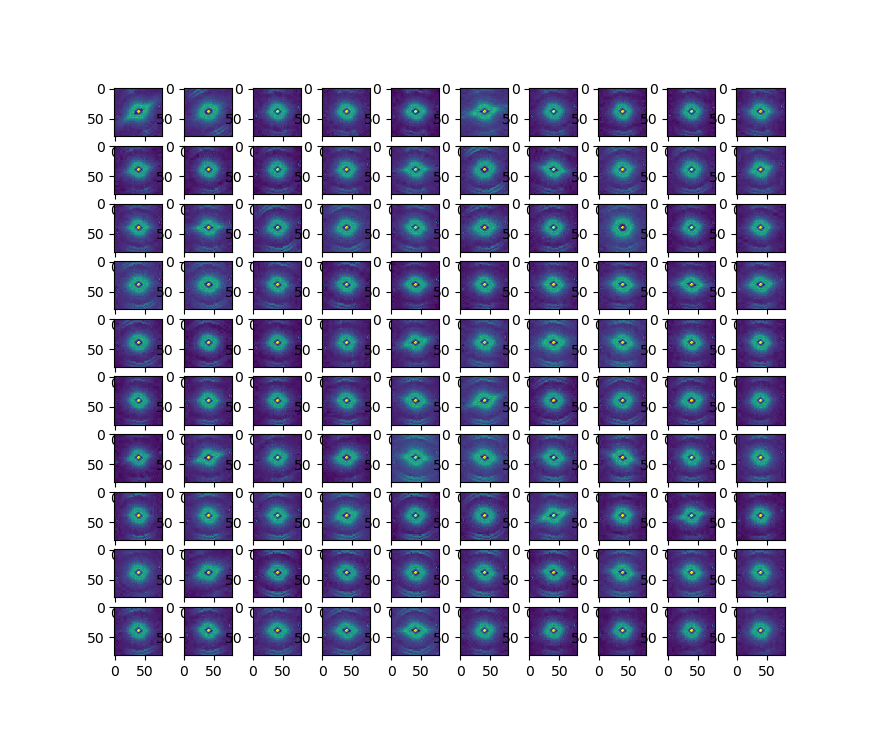

In [526]:
group_id = 1
idv = get_index(group_id)
print('total num from group {}: {}'.format(group_id, len(idv)))
fig, axs = plt.subplots(nrows=10, ncols=10)
for i,ax in enumerate(axs.ravel()):
    v_index = idv[i*2]
    ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

total num from group 2: 115


<IPython.core.display.Javascript object>


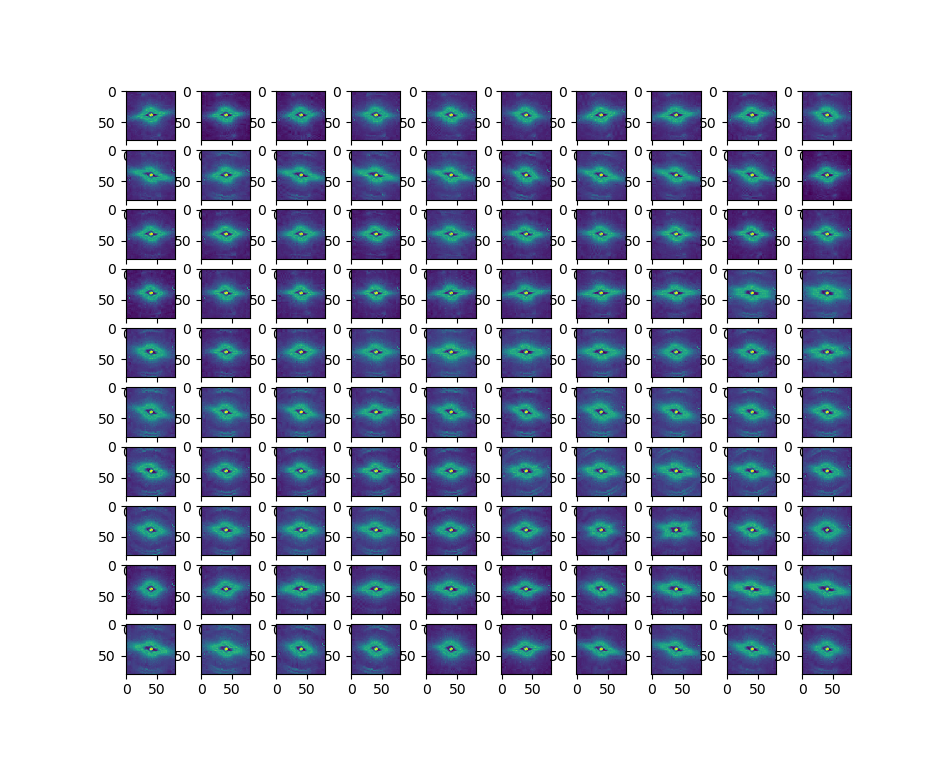

In [524]:
group_id = 2
idv = get_index(group_id)
print('total num from group {}: {}'.format(group_id, len(idv)))
fig, axs = plt.subplots(nrows=10, ncols=10)
for i,ax in enumerate(axs.ravel()):
    v_index = idv[i]
    ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

total num from group 3: 84


<IPython.core.display.Javascript object>


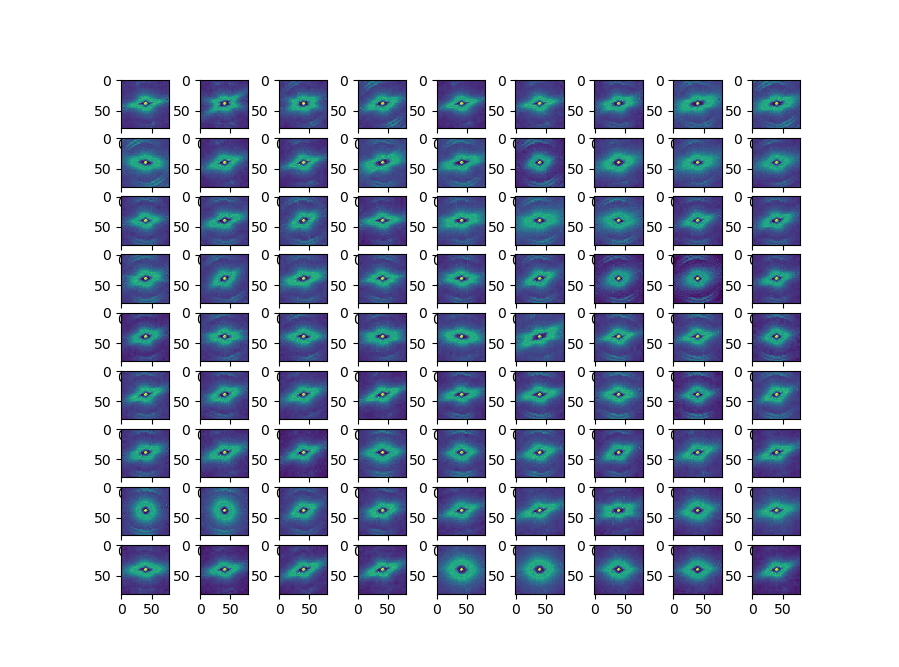

In [531]:
group_id = 3
idv = get_index(group_id)
print('total num from group {}: {}'.format(group_id, len(idv)))
fig, axs = plt.subplots(nrows=9, ncols=9)
for i,ax in enumerate(axs.ravel()):
    v_index = idv[i]
    ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

In [384]:
# group_id = 4
# idv = get_index(group_id)

# fig, axs = plt.subplots(nrows=6, ncols=6)
# for i,ax in enumerate(axs.ravel()):
#     v_index = idv[i]
#     ax.imshow(data[v_index,:].reshape(d_shape[0],d_shape[1]))

# Map clustering results to x,y positions

<IPython.core.display.Javascript object>


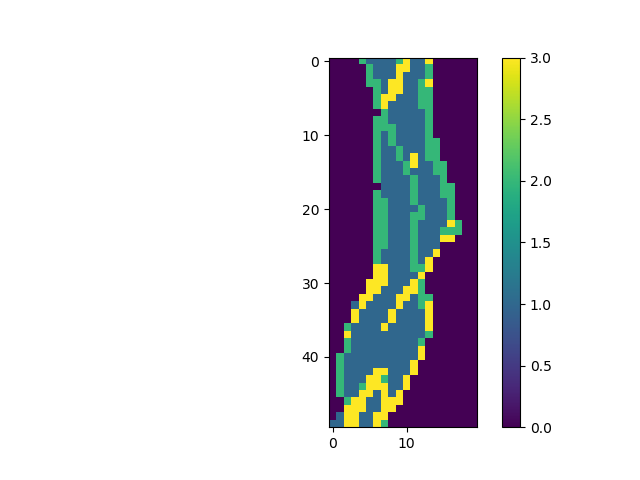

In [508]:
# image for 3 clustering groups

fig, ax = plt.subplots()
im = ax.imshow(kmeans_out.reshape([20,50]).T)
plt.colorbar(im)

<IPython.core.display.Javascript object>


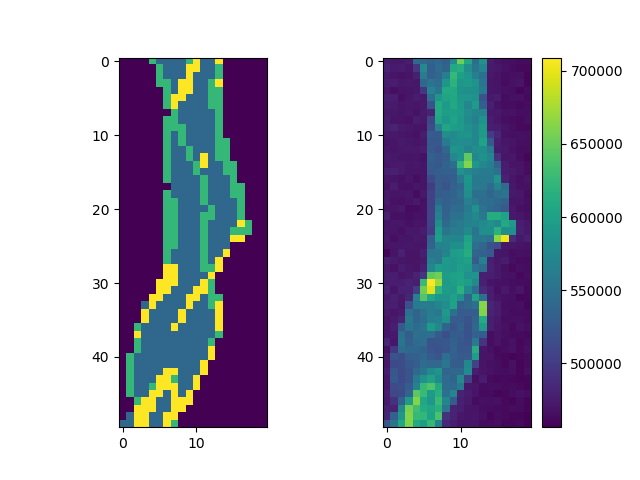

In [543]:
# image for total intensity

data_intensity = np.sum(data, axis=1)
#data_intensity_d = data_intensity/np.max(data_intensity)*3
#data_intensity_d = np.array(data_intensity_d, dtype=int)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(kmeans_out.reshape([20,50]).T)

im = axs[1].imshow(data_intensity.reshape([20,50]).T)
plt.colorbar(im)

# Spectral Cluster 

In [490]:
# Test the Spectral Cluster Algorithms

spectral = SpectralClustering(n_clusters=nclusters, eigen_solver='arpack', affinity='nearest_neighbors')
labels_spectral = spectral.fit_predict(reduced_data)

<IPython.core.display.Javascript object>


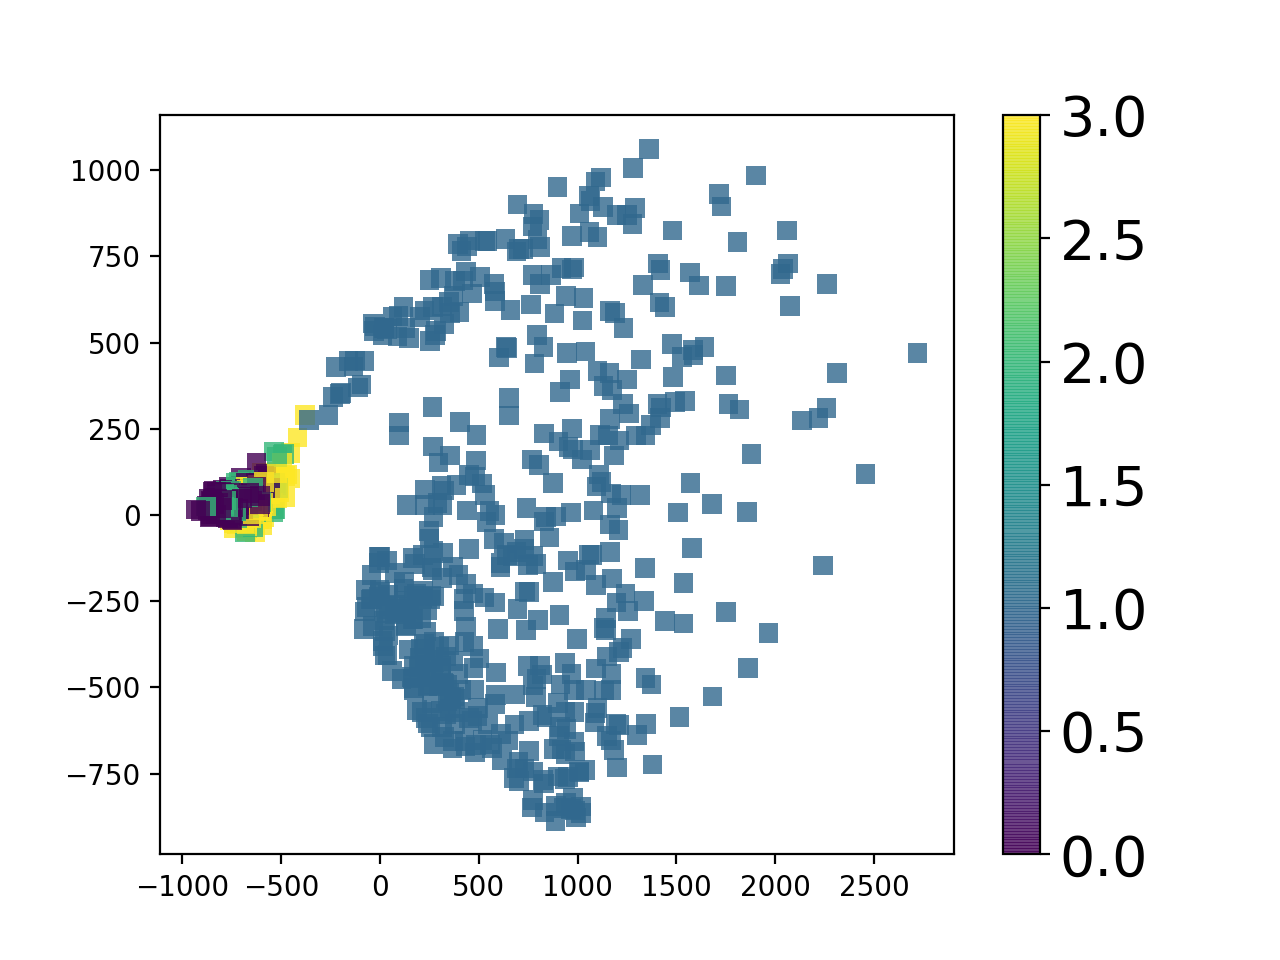

In [485]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=labels_spectral, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

# AgglomerativeClustering

In [486]:

ward = AgglomerativeClustering(n_clusters=nclusters, linkage='ward')
labels_ward = ward.fit_predict(reduced_data)

<IPython.core.display.Javascript object>


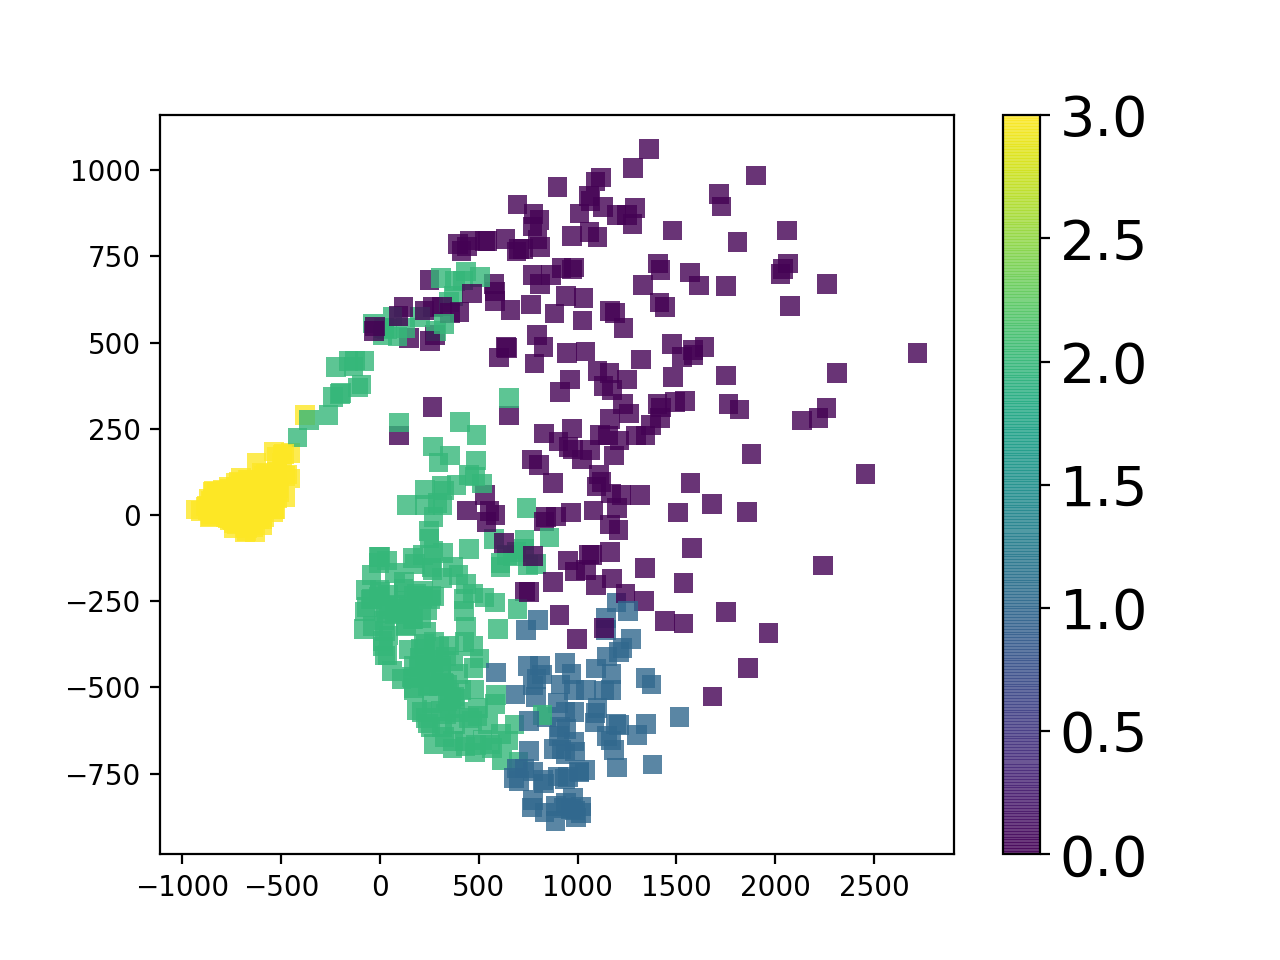

In [487]:
fig, ax = plt.subplots()

im = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                c=labels_ward, marker='s', s=50, alpha=0.8,
                linewidths=1, linewidth=0)
cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=20) 

# MDS visualization

In [437]:
mds = MDS(n_components=2, metric=True, n_init=2, max_iter=100, n_jobs=1, random_state=42)
pos = mds.fit(reduced_data).embedding_

<IPython.core.display.Javascript object>


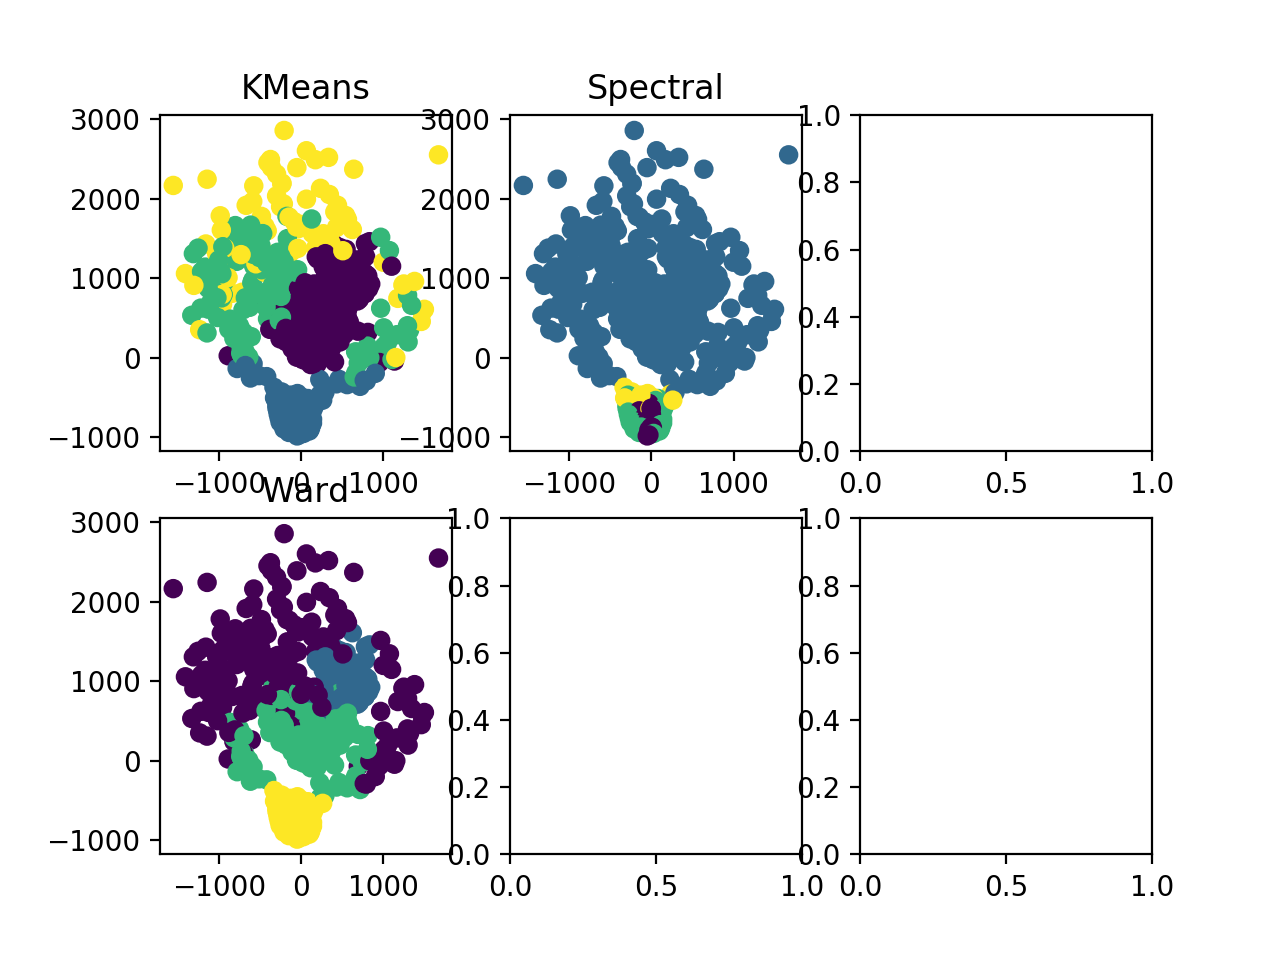

In [488]:
fig1, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3)
#fig1.set_size_inches(20,12)
ax1.scatter(pos[:,0], pos[:,1], c=kmeans_out)
ax1.set_title('KMeans')
ax2.scatter(pos[:,0], pos[:,1], c=labels_spectral)
ax2.set_title('Spectral')
# ax3.scatter(pos[:,0], pos[:,1], c=labels_complete)
# ax3.set_title('Complete')
ax4.scatter(pos[:,0], pos[:,1], c=labels_ward)
ax4.set_title('Ward')
# ax5.scatter(pos[:,0], pos[:,1], c=db_labels)
# ax5.set_title('DBSCAN')
# ax6.scatter(pos[:,0], pos[:,1], c=labels_birch)
# ax6.set_title('BIRCH')
plt.show()